# Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio.xlsx')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,BAJA,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,NaN,NaN
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12.0,16.0
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,NaN,NaN
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,OP,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2.0,NaN
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,OP,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,NaN,NaN


In [3]:
data.shape

(548145, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548145 entries, 0 to 548144
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Installation Date       548145 non-null  datetime64[ns]
 1   Installation Number     548145 non-null  int64         
 2   Client Type             548144 non-null  object        
 3   Panel                   548145 non-null  object        
 4   Territorial             548145 non-null  object        
 5   Provincia               548145 non-null  object        
 6   Zip                     548145 non-null  object        
 7   Gender                  548145 non-null  object        
 8   Nationality             548145 non-null  object        
 9   Country Of Birth        548145 non-null  object        
 10  Born Date               546106 non-null  datetime64[ns]
 11  Housing Type            548145 non-null  object        
 12  Labor Situation         548145

In [5]:
data.isnull().sum()

Installation Date              0
Installation Number            0
Client Type                    1
Panel                          0
Territorial                    0
Provincia                      0
Zip                            0
Gender                         0
Nationality                    0
Country Of Birth               0
Born Date                   2039
Housing Type                   0
Labor Situation                0
Marital Status                 0
Income Amount                  0
Number Pay                     0
Price List                     1
Monitoring Status Date         0
Monitoring Status              0
Tipo Instalacion               0
Financiado                     0
Rango Kit                      0
Resumen Precio                 0
Kit Contado                    0
Kit Total                      0
Kit Mensualidad                0
Quejas                    447411
MT                        412481
dtype: int64

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 548145

Número de Columnas: 28

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Monitoring Status Date', 'Monitoring Status', 'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas', 'MT']

Valores nulos: 861933

Valores únicos:

Installation Date           2204
Installation Number       548042
Client Type                    2
Panel                          3
Territorial                    7
Provincia                     54
Zip                         9334
Gender                         2
Nationality                   11
Country Of Birth             202
Born Date                  28248
Housing Type                   6
Labor Situation                8
Marital St

In [8]:
data['Monitoring Status'].unique()

array(['BAJA', 'OP  ', 'XPRU', 'XCAN', 'XVEN'], dtype=object)

In [9]:
data['Monitoring Status'] = data['Monitoring Status'].replace({'XPRU': 'BAJA', 'XCAN': 'BAJA', 'XVEN': 'BAJA'})
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['MT'] = data['MT'].replace(np.nan, 0).astype('int')
data['Installation Number'] = data['Installation Number'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,BAJA,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12,16
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,OP,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,OP,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2,0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,OP,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0,0


In [10]:
data.describe()

,Income Amount,Number Pay,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
count,5.481450e+05,548145.000000,548145.000000,548145.000000,548145.000000,548145.000000,548145.000000
mean,2.104997e+04,13.013278,106.236458,480.280305,9.934433,0.335008,4.838196
std,4.165484e+06,1.078743,99.415256,111.307325,1.204917,0.978447,17.752938
min,0.000000e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,49.000000,409.000000,10.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,99.000000,459.000000,10.000000,0.000000,0.000000
75%,2.000000e+03,14.000000,199.000000,559.000000,10.000000,0.000000,0.000000
max,1.600000e+09,16.000000,1097.000000,4939.000000,99.000000,46.000000,275.000000


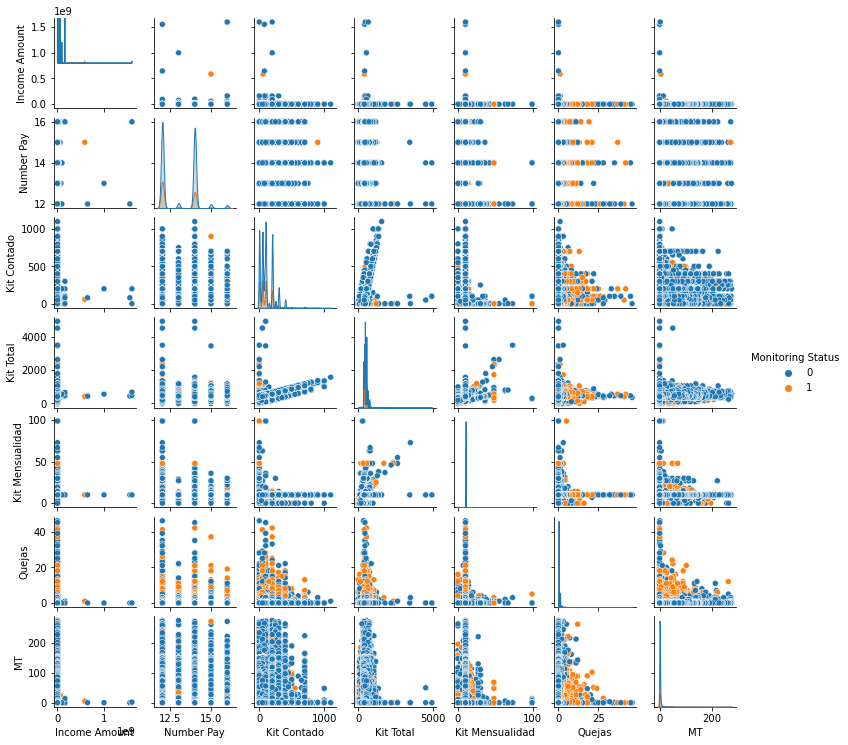

In [34]:
# Don´t do this!!!!

sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

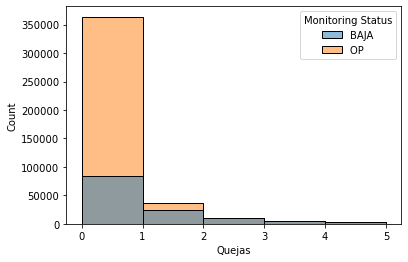

In [11]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', binwidth=1,  binrange = (0,5));

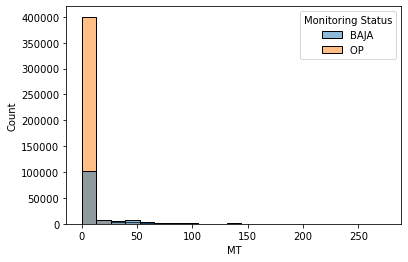

In [12]:
sns.histplot(data = data, x="MT", hue = 'Monitoring Status');

In [13]:
data.groupby("Monitoring Status")["Monitoring Status"].count()

Monitoring Status
BAJA    128269
OP      419876
Name: Monitoring Status, dtype: int64

### Totales y % de Baja en variables categóricas

'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Housing Type', 'Labor Situation', 'Marital Status', 'Number Pay'

In [14]:
tab1 = pd.crosstab(data["Nationality"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Nationality"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Nationality,,,,,
AF - AFRICA MENOS MAGREB,323,257,580,0.556897,0.443103
AJ - AUSTRALIA Y JAPON,15,75,90,0.166667,0.833333
AS - ASIA MENOS JAPON,728,1664,2392,0.304348,0.695652
ES - ESPAÃOLA,1262,9156,10418,0.121136,0.878864
ES - ESPAÑOLA,113113,381236,494349,0.228812,0.771188
IB - IBEROAMERICA,2600,2673,5273,0.493078,0.506922
MA - MAGREB,475,336,811,0.585697,0.414303
OT - OTROS,1643,2183,3826,0.429430,0.570570
RE - RESTO DE EUROPA,743,1934,2677,0.277549,0.722451


In [15]:
tab1 = pd.crosstab(data["Client Type"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Client Type"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Client Type,,,,,
Gran_Cuenta,6216,17695,23911,0.259964,0.740036
Normal,122053,402180,524233,0.232822,0.767178
All,128269,419875,548144,0.234006,0.765994


In [16]:
tab1 = pd.crosstab(data["Panel"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Panel"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Panel,,,,,
SDVERW,3,0,3,1.000000,0.000000
SDVFAST,100337,382800,483137,0.207678,0.792322
SDVFSW,27929,37076,65005,0.429644,0.570356
All,128269,419876,548145,0.234006,0.765994


In [17]:
tab1 = pd.crosstab(data["Territorial"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Territorial"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Territorial,,,,,
Centro-Noroeste,22855,70947,93802,0.243652,0.756348
Centro-Norte,19560,61219,80779,0.242142,0.757858
Centro-Sur,19404,56098,75502,0.257000,0.743000
ErrorProvincia,6,9,15,0.400000,0.600000
Este,22555,74679,97234,0.231966,0.768034
Noreste,20140,87728,107868,0.186710,0.813290
Sur,23749,69196,92945,0.255517,0.744483
All,128269,419876,548145,0.234006,0.765994


In [18]:
tab1 = pd.crosstab(data["Provincia"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Provincia"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Provincia,,,,,
Alava,523,1151,1674,0.312425,0.687575
Albacete,999,2508,3507,0.284859,0.715141
Alicante,5484,19411,24895,0.220285,0.779715
Almeria,2049,6075,8124,0.252216,0.747784
Asturias,2263,6718,8981,0.251976,0.748024
Avila,269,1073,1342,0.200447,0.799553
Badajoz,2270,5268,7538,0.301141,0.698859
Baleares,3952,19771,23723,0.166589,0.833411
Barcelona,14214,64416,78630,0.180771,0.819229


In [19]:
tab1 = pd.crosstab(data["Gender"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Gender"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Gender,,,,,
H - HOMBRE,97917,326127,424044,0.230912,0.769088
M - MUJER,30352,93749,124101,0.244575,0.755425
All,128269,419876,548145,0.234006,0.765994


In [20]:
tab1 = pd.crosstab(data["Housing Type"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Housing Type"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Housing Type,,,,,
1 - PROPIEDAD SIN HIPOTECA,84147,327443,411590,0.204444,0.795556
2 - PROPIEDAD HIPOTECADA,22076,65331,87407,0.252566,0.747434
3 - ALQUILER,18271,20988,39259,0.465396,0.534604
4 - FAMILIARES/PADRES,2409,2697,5106,0.471798,0.528202
5 - EMPRESA,1364,3416,4780,0.285356,0.714644
6 - OTROS,2,1,3,0.666667,0.333333
All,128269,419876,548145,0.234006,0.765994


In [21]:
tab1 = pd.crosstab(data["Labor Situation"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Labor Situation"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Labor Situation,,,,,
01 ASALARIADO FIJO,39652,161889,201541,0.196744,0.803256
02 ASALARIADO TEMPORAL,1378,1707,3085,0.446677,0.553323
03 FUNCIONARIO,3521,18229,21750,0.161885,0.838115
04 AUTONOMO,64046,138334,202380,0.316464,0.683536
06 PARADO,3303,4119,7422,0.445028,0.554972
07 PENSIONISTA (JUBILACION),13971,89640,103611,0.134841,0.865159
08 PENSIONISTA (VIUDEDAD),1256,3423,4679,0.268433,0.731567
09 PENSIONISTA (LARGA ENFERMEDAD),1142,2535,3677,0.310579,0.689421
All,128269,419876,548145,0.234006,0.765994


In [22]:
tab1 = pd.crosstab(data["Marital Status"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Marital Status"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Marital Status,,,,,
1 - SOLTERO,41579,84702,126281,0.329258,0.670742
2 - CASADO,73645,292452,366097,0.201163,0.798837
3 - VIUDO,5334,25205,30539,0.174662,0.825338
4 - SEPARADO/DIVORCIADO,6569,15231,21800,0.301330,0.698670
5 ? PAREJA DE HECHO,1132,2249,3381,0.334812,0.665188
5 â PAREJA DE HECHO,10,37,47,0.212766,0.787234
All,128269,419876,548145,0.234006,0.765994


In [23]:
tab1 = pd.crosstab(data["Number Pay"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Number Pay"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Number Pay,,,,,
12,75875,201998,277873,0.273056,0.726944
13,2825,11124,13949,0.202523,0.797477
14,46097,190040,236137,0.195213,0.804787
15,2182,9362,11544,0.189016,0.810984
16,1290,7352,8642,0.149271,0.850729
All,128269,419876,548145,0.234006,0.765994


In [24]:
tab1 = pd.crosstab(data["Financiado"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Financiado"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Financiado,,,,,
Contado,643,2674,3317,0.193850,0.806150
Financiado,125933,412577,538510,0.233855,0.766145
Financiado GGCC,1693,4625,6318,0.267965,0.732035
All,128269,419876,548145,0.234006,0.765994


In [25]:
tab1 = pd.crosstab(data["Rango Kit"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango Kit"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Rango Kit,,,,,
A 0,30941,86015,116956,0.264552,0.735448
Entre 000-050,31650,81202,112852,0.280456,0.719544
Entre 050-100,34510,124032,158542,0.217671,0.782329
Entre 100-200,22493,86977,109470,0.205472,0.794528
Entre 200-300,6766,28592,35358,0.191357,0.808643
Mas de 300,1909,13058,14967,0.127547,0.872453
All,128269,419876,548145,0.234006,0.765994


In [26]:
tab1 = pd.crosstab(data["Tipo Instalacion"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Tipo Instalacion"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,BAJA,OP,All,BAJA,OP
Tipo Instalacion,,,,,
C-Comunidad de Propietarios,30,43,73,0.410959,0.589041
N- Oficinas en Altura,63,360,423,0.148936,0.851064
N-Autocaravana,0,1,1,0.000000,1.000000
"N-Bar, Pub, Restaurante",9683,9307,18990,0.509900,0.490100
N-Casetas de Obra,18,38,56,0.321429,0.678571
"N-Nave, taller (industrial)",8950,18277,27227,0.328718,0.671282
"N-Oficinas, empresas",3538,8148,11686,0.302755,0.697245
N-Tienda- negocio al publico,26373,32779,59152,0.445851,0.554149
P-Apartamento (domicilio particular),37521,170115,207636,0.180706,0.819294


### Correlación

In [27]:
data['Monitoring Status'] = data['Monitoring Status'].astype('str').str.strip()
data['Monitoring Status'] = data['Monitoring Status'].replace({'OP': 0, 'BAJA': 1}).astype(int)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12,16
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,0,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2,0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,0,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0,0


In [28]:
corr = data.corr()
corr

,Income Amount,Number Pay,Monitoring Status,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
Income Amount,1.000000,0.006008,-0.001712,-0.000030,0.001223,0.000235,-0.001090,-0.000735
Number Pay,0.006008,1.000000,-0.092860,0.044048,0.014750,-0.000191,-0.018311,-0.026947
Monitoring Status,-0.001712,-0.092860,1.000000,-0.074762,-0.047827,0.000204,0.209200,0.175635
Kit Contado,-0.000030,0.044048,-0.074762,1.000000,0.869710,-0.064898,-0.019223,-0.013997
Kit Total,0.001223,0.014750,-0.047827,0.869710,1.000000,0.157963,-0.031873,-0.003434
Kit Mensualidad,0.000235,-0.000191,0.000204,-0.064898,0.157963,1.000000,-0.004433,-0.000797
Quejas,-0.001090,-0.018311,0.209200,-0.019223,-0.031873,-0.004433,1.000000,0.033232
MT,-0.000735,-0.026947,0.175635,-0.013997,-0.003434,-0.000797,0.033232,1.000000


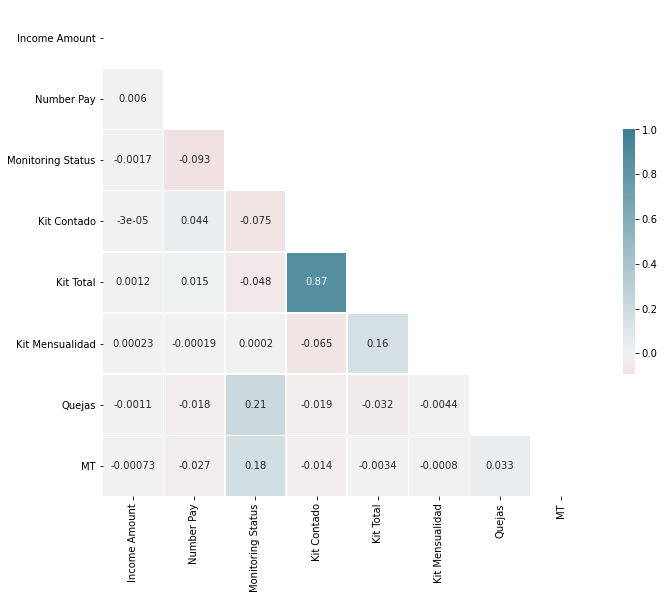

In [29]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [30]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833069,Normal,SDVFAST,Sur,Granada,18198,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1959-09-02,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,2 - CASADO,2000,13,EED,2019-06-30,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,0,0
1,2015-01-02,1833074,Normal,SDVFAST,Noreste,Barcelona,08173,M - MUJER,ES - ESPAÑOLA,SPAIN,1971-04-15,4 - FAMILIARES/PADRES,06 PARADO,4 - SEPARADO/DIVORCIADO,600,12,EED,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 000-050,49+(36*10),49,409,10,12,16
2,2015-01-02,1833079,Normal,SDVFAST,Centro-Noroeste,Madrid Noroeste,28011,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1968-02-10,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,4 - SEPARADO/DIVORCIADO,2500,14,HBD,2015-01-05,0,P-Apartamento (domicilio particular),Financiado,Entre 050-100,99+(36*10),99,459,10,0,0
3,2015-01-02,1833080,Normal,SDVFAST,Sur,Sevilla,41500,M - MUJER,ES - ESPAÑOLA,SPAIN,1968-12-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1800,12,EED,2015-01-13,0,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,2,0
4,2015-01-02,1833081,Normal,SDVFAST,Noreste,Barcelona,08014,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1977-02-22,2 - PROPIEDAD HIPOTECADA,04 AUTONOMO,2 - CASADO,1500,12,EEE,2015-01-07,0,N-Tienda- negocio al publico,Financiado,Entre 050-100,99+(36*10),99,459,10,0,0


### Filtrado de una comunidad para MVP

In [31]:
provincias = ['Alicante', 'Valencia', 'Castellon']

data_filtered = data[data['Provincia'].isin(provincias)]
data_filtered.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
16,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,03300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
57,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,03689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0
90,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
110,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,03150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
117,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,03294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53


In [32]:
data_filtered.shape

(55225, 28)

In [33]:
data_filtered.to_excel('../data/portfolio_com_valencia.xlsx')